## Last Two Brain Cells

Group Members - 
 - Ananya Kulkarni
 - Souvik Saha

Purpose of this code is to extract PCA information from the recordings available

In [1]:
import mne, mne_bids
# mne.set_config('MNE_BROWSER_BACKEND', 'matplotlib') # To plot in the notebook using matplotlib
import sys
sys.path.insert(0, '.')

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

import os

In [2]:
music_epoch_folder = '/home/fsociety/Documents/Datasets/project-epochs'
no_music_run = os.path.join(music_epoch_folder, 'average_no_audio.npy')

# find the folders with more than x number of files and save the full path to a list
files_list = {}
num_recording_threshold = 5
for root, dirs, files in os.walk(music_epoch_folder):
    if len(files) >= num_recording_threshold:
        files_list[root] = [os.path.join(root,f) for f in files if f.endswith('.fif')]


In [3]:
# read numpy array from fil
no_music_array = np.load(no_music_run)[:2441].reshape(2441)

In [4]:
# load the epochs inside the epoch_files list
epochs = {}
for folder, files in files_list.items():
    epoch = []
    
    for file in files:
        print(f'Loading {file} {folder}')
        epoch.extend(mne.read_epochs(file, verbose=False))

    epochs[int(folder.split('/')[-1])] = epoch

Loading /home/fsociety/Documents/Datasets/project-epochs/332/13_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/project-epochs/332/27_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/project-epochs/332/11_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/project-epochs/332/30_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/project-epochs/332/21_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/project-epochs/332/25_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/project-epochs/332/01_run3_music-epo.fif /home/fsociety/Documents/Datasets/project-epochs/332
Loading /home/fsociety/Documents/Datasets/projec

In [5]:
# calculate the average of the epochs in each key and plot psd
epochs_avg = {}
for key in epochs.keys():
    print(f'Calculating average for {key}')
    
    epochs_avg[key] = np.mean(np.mean(epochs[key], axis = 0), axis=0)

Calculating average for 332
Calculating average for 303
Calculating average for 311
Calculating average for 333
Calculating average for 342
Calculating average for 330
Calculating average for 340
Calculating average for 315
Calculating average for 355
Calculating average for 316
Calculating average for 306
Calculating average for 345
Calculating average for 360


In [6]:
# convert the dictionary to a pandas dataframe
df = pd.DataFrame(epochs_avg)
df['no_music'] = no_music_array

In [7]:
df.corr()

,332,303,311,333,342,330,340,315,355,316,306,345,360,no_music
332,1.000000,0.033864,-0.001033,0.021620,-0.022985,-0.003456,0.058913,0.006863,-0.000576,0.012523,-0.017534,-0.016477,-0.002657,0.011976
303,0.033864,1.000000,0.023606,-0.055574,-0.010441,0.019471,-0.012563,0.002870,-0.036039,-0.000954,-0.018851,0.026869,-0.024432,-0.001927
311,-0.001033,0.023606,1.000000,0.005622,0.000146,-0.070347,0.020581,0.016434,0.019110,-0.005164,-0.001702,-0.016816,-0.005524,-0.024914
333,0.021620,-0.055574,0.005622,1.000000,0.015166,0.048131,0.016259,0.017517,-0.006568,0.022903,0.017410,0.019968,-0.010295,0.035414
342,-0.022985,-0.010441,0.000146,0.015166,1.000000,0.011195,-0.005959,-0.016134,-0.021291,0.014159,0.010126,-0.005249,0.030061,0.008706
330,-0.003456,0.019471,-0.070347,0.048131,0.011195,1.000000,0.017702,0.011760,-0.016705,-0.009091,-0.040084,0.000774,-0.017969,0.000057
340,0.058913,-0.012563,0.020581,0.016259,-0.005959,0.017702,1.000000,0.003174,-0.019020,-0.021414,-0.005378,-0.004456,-0.020782,-0.003279
315,0.006863,0.002870,0.016434,0.017517,-0.016134,0.011760,0.003174,1.000000,0.025630,-0.026494,0.027779,0.009675,0.045952,-0.032184
355,-0.000576,-0.036039,0.019110,-0.006568,-0.021291,-0.016705,-0.019020,0.025630,1.000000,-0.024679,0.007042,-0.007637,-0.020261,-0.013157
316,0.012523,-0.000954,-0.005164,0.022903,0.014159,-0.009091,-0.021414,-0.026494,-0.024679,1.000000,-0.015466,-0.023140,0.043003,0.004400


<Axes: >

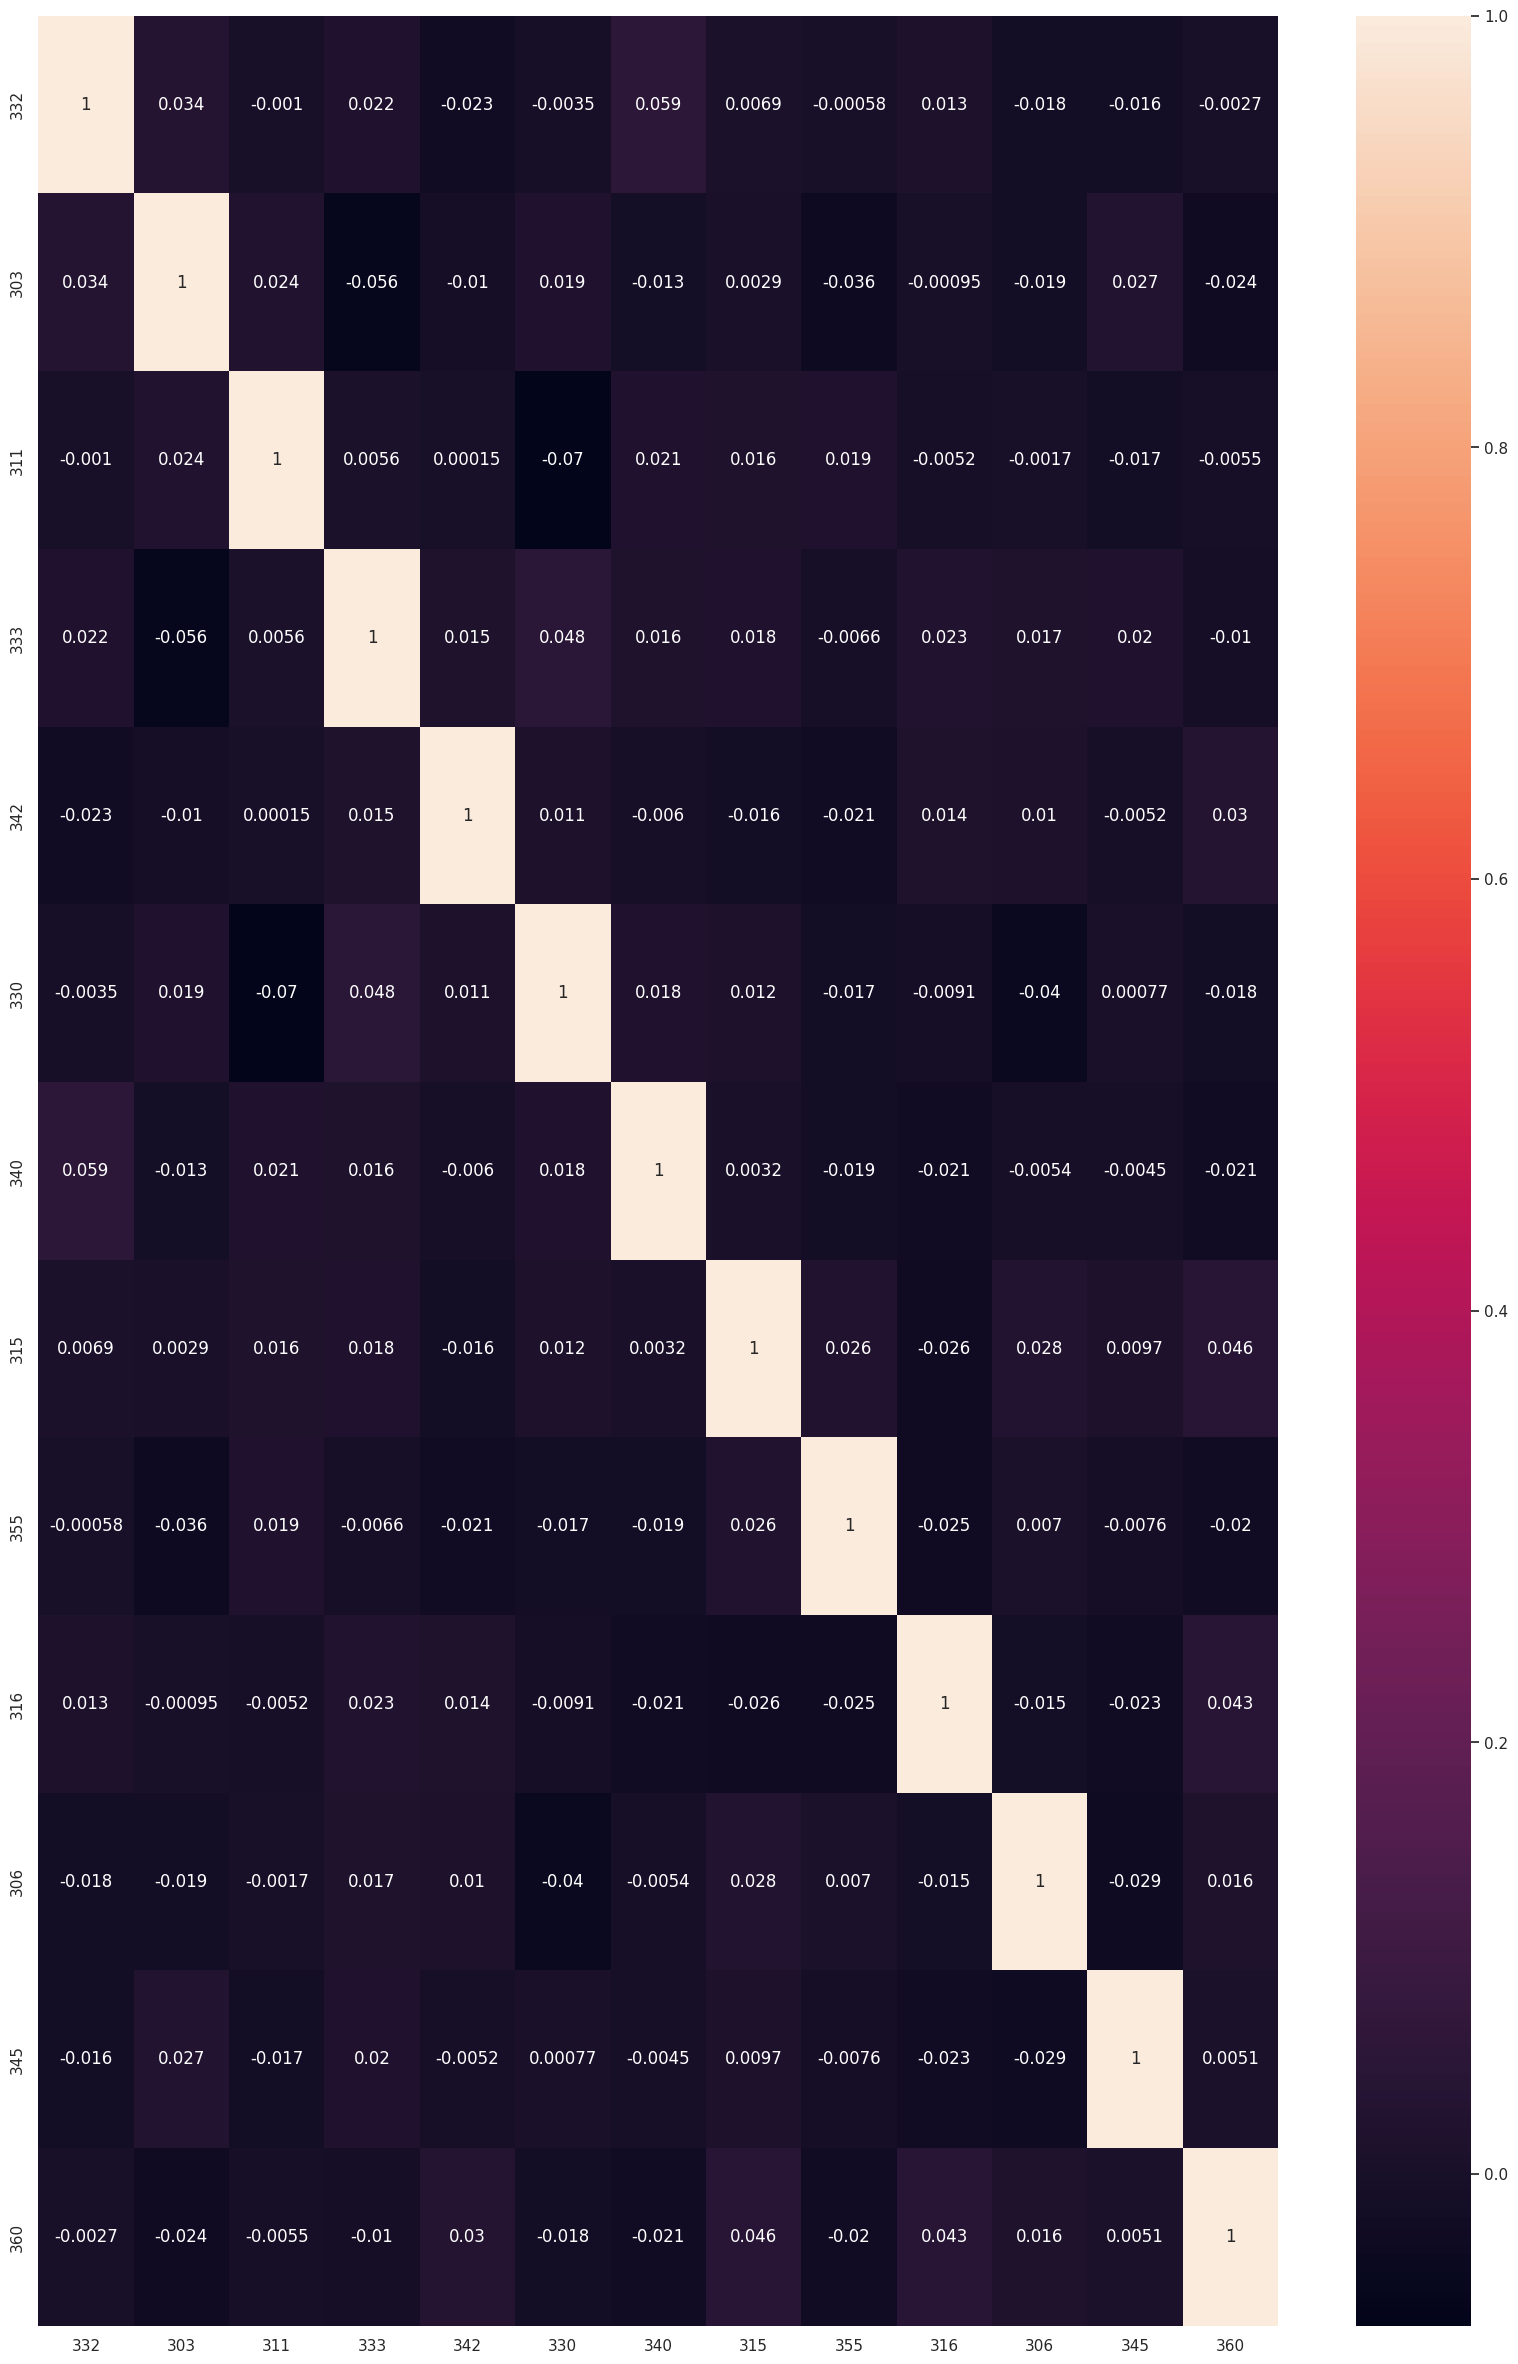

In [8]:
# plot the correlation matrix
sns.set(rc={"figure.figsize":(20, 30)})
sns.heatmap(df.drop('no_music', axis=1).corr(), annot=True)

In [9]:
# Run a PCA on the dataframe after dropping the no_music column
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df.drop('no_music', axis=1).T)

PCA()

In [10]:
# analyze the pca components
# pca.components_.shape
principal_components = pca.transform(df.drop('no_music', axis=1).T)


In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

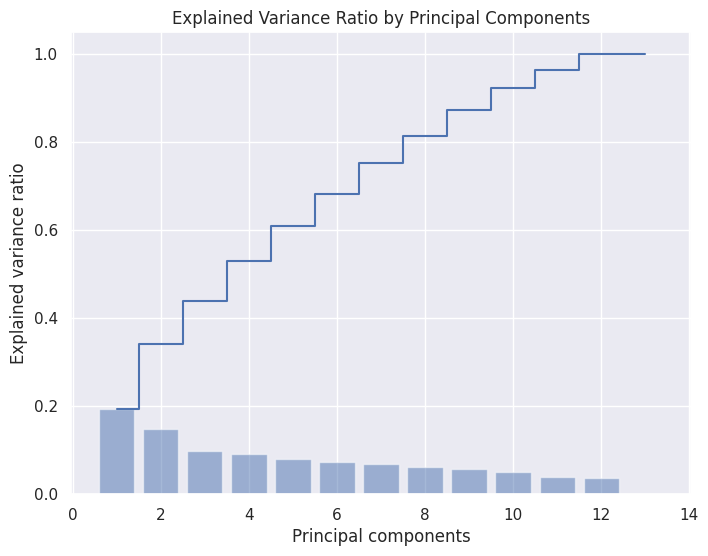

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

Above graph explains contribution of each Principal component to the net result. We can observe that first two components explain a large content of the variance

Number of components to retain 95% variance: 11


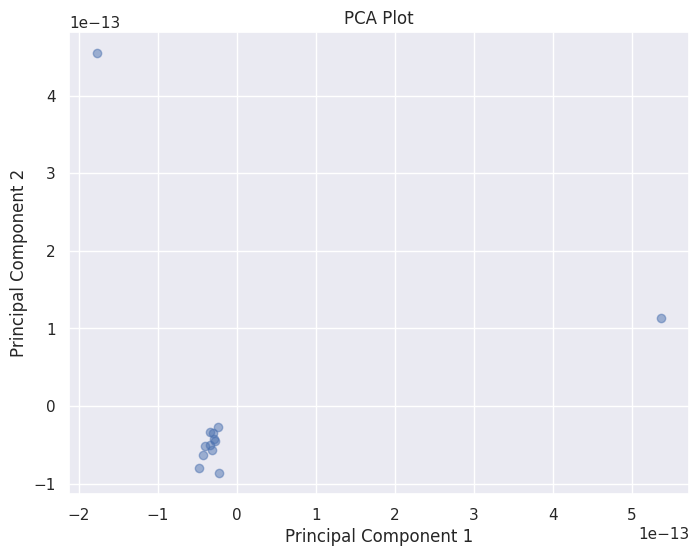

In [13]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components to retain 95% variance: {n_components}')

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

The above graph shows us how the first two components explain a large portion. We see 1 groups, and 2 outliers. We cannot come to a better conclusion without more proper data.
